In [1]:
import numpy as np
import roboticstoolbox as rtb
from spatialmath import *
from math import pi
import matplotlib.pyplot as plt
from matplotlib import cm
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

%matplotlib notebook

The robotics toolbox allows you to define a robot in many ways.
Here the robot model will be based on 2 types of objects: **DHLink** and **DHRobot**. If you are using Matlab environment the same effect is available when using commands **Link** and **SeriaLink**.

Object **DHLink** can contain information about both kinematic and dynamic properties. Only elements related to the kinematics of the manipulator will be considered here. Defining a single **DHLink** object looks like this
```py
L1 = rtb.DHLink(d=0.0, alpha=0.0, theta=0.0, a=0.0, sigma=0)
```
where L1 is the name of the variable, into which the created object will be entered. The required parameters are in accordance with the DH notation, the additional parameter **sigma** defines the joint type: 0 - rotary joint, 1 - prismatic joint. The values given in the example above are the default values of individual parameters, which means that it is not necessary to provide the values of all parameters and if any parameter is missing, the default value will be used.
For example, a rotary joint can be defined like this:
```py
L1 = rtb.DHLink(d=1.0)
```
In Python, you can also omit the names of the parameters by giving arguments only, then their interpretation is determined by the order, you cannot omit parameters with a default value, e.g.:
```py
L1 = rtb.DHLink(1.0)                # equals L1 = rtb.DHLink(d=1.0)
L2 = rtb.DHLink(1.0, 0.0, 0.0, 0.5) # equals L1 = rtb.DHLink(d=1.0, a=0.5)
L2 = rtb.DHLink(1.0, 0.5)           # equals L1 = rtb.DHLink(d=1.0, alpha=0.5)
```

The creation of a simple two-joints manipulator may look like this:

In [2]:
L1 = rtb.DHLink(d=1.0, alpha=pi/2, theta=0.0, a=0.5)
L2 = rtb.DHLink(theta=0.0, a=0.7)

To build a robot model, you need to create a new DHRobot object. As an argument to the constructor, it is enough to pass a list of defined objects of the DHLink type, which in the given order will create the kinematic chain of the manipulator.

In [3]:
robot = rtb.DHRobot([L1, L2])

After the robot object is created, you can view the DH table and validate the model.

In [4]:
print(robot)

┏━━━━┳━━━━━┳━━━━━┳━━━━━━━┓
┃θⱼ  ┃ dⱼ  ┃ aⱼ  ┃  ⍺ⱼ   ┃
┣━━━━╋━━━━━╋━━━━━╋━━━━━━━┫
┃ q1 ┃ 1.0 ┃ 0.5 ┃ 90.0° ┃
┃ q2 ┃ 0.0 ┃ 0.7 ┃  0.0° ┃
┗━━━━┻━━━━━┻━━━━━┻━━━━━━━┛



**Note: For rotary joints, the value of the variable angle θ has to be declared as 0, the same applies to the d parameter for prismatic joints.**

A robot created in this way can be visualized using the plot command invoked on a **DHRobot** object. As an argument, a list of values of successive join variables should be given.

<IPython.core.display.Javascript object>


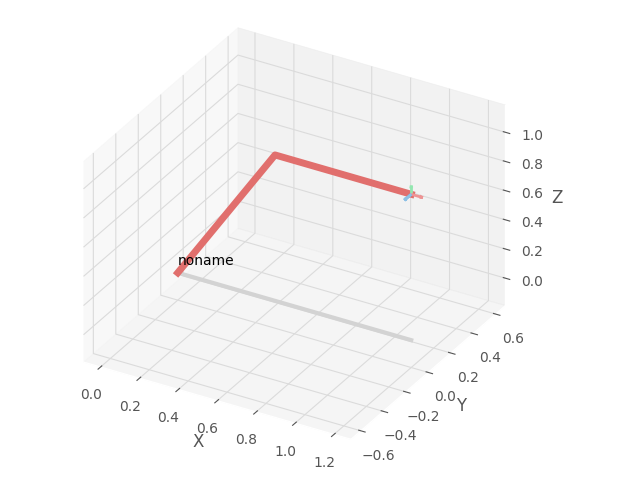

In [5]:
robot.plot([0.0, 0.0]);

By giving an array of many elements as an argument to the **plot** method, it is possible to show an animation of the manipulator's movement.

<IPython.core.display.Javascript object>


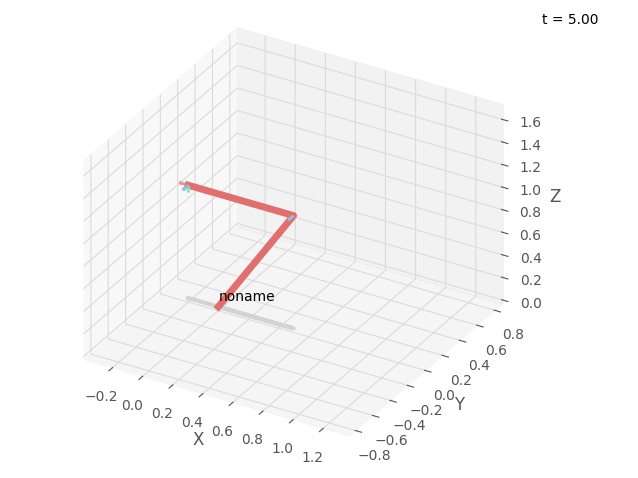

In [6]:
qr = []
for i in range(101):
    q = [0.0, pi/100 * i]
    qr.append(q)

q_array = np.array(qr)
robot.plot(q_array)

The position of the manipulator tip for the given values of joint variables - a solution of a forward kinematics problem - can be found using the **fkine** method. As in the **plot** method, the values of the join variables should be given as an argument.

In [8]:
robot.fkine([0.0, 0.0])

SE3:   1           0           0           1.2          
       0           0          -1           0            
       0           1           0           1            
       0           0           0           1            
    

The returned result is a homogeneous matrix describing the location of the manipulator's tip in space.

The time plot of joint variables can be visualized on a graph.

<IPython.core.display.Javascript object>


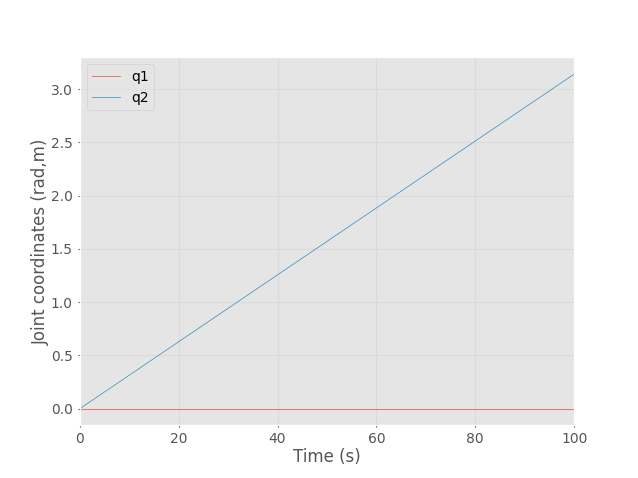

In [9]:
rtb.tools.trajectory.qplot(q_array, block=True)

To save the result to a file, use the following code:
```py
with open("result.txt", "w") as file:      # opening file "result.txt" in write mode ("w")
    file.write("Insert text here")          # appending text to the file
```
**NOTE: If the file already exists, the previous content of the file will be lost and replaced with the new one.**

In [2]:
with open("result.txt", "w") as file:
    file.write("Insert text here")